In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:06, 19.34it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.69it/s]

Epoch 1 of 100
Generator loss: 0.05459936, Discriminator loss: 0.07934993


118it [00:05, 19.98it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 16.00it/s]

Epoch 2 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.51it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.24it/s]

Epoch 3 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.22it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.38it/s]

Epoch 4 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.61it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


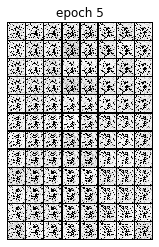

  2%|▏         | 2/117 [00:00<00:08, 12.99it/s]

Epoch 5 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.99it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.50it/s]

Epoch 6 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.91it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.15it/s]

Epoch 7 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.93it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.75it/s]

Epoch 8 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.05it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 14.60it/s]

Epoch 9 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


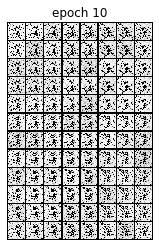

  2%|▏         | 2/117 [00:00<00:08, 12.90it/s]

Epoch 10 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.05it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.27it/s]

Epoch 11 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.08it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.75it/s]

Epoch 12 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.98it/s]                         
  2%|▏         | 2/117 [00:00<00:08, 14.08it/s]

Epoch 13 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.05it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.27it/s]

Epoch 14 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


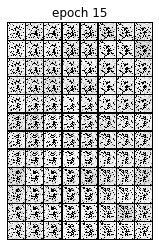

  2%|▏         | 2/117 [00:00<00:09, 12.58it/s]

Epoch 15 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.88it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.27it/s]

Epoch 16 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.04it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.75it/s]

Epoch 17 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.22it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.63it/s]

Epoch 18 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.97it/s]                         
  2%|▏         | 2/117 [00:00<00:08, 14.08it/s]

Epoch 19 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.30it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


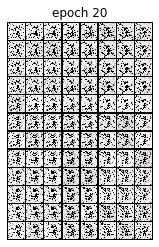

  2%|▏         | 2/117 [00:00<00:08, 12.90it/s]

Epoch 20 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.20it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 14.39it/s]

Epoch 21 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.80it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.38it/s]

Epoch 22 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.00it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.15it/s]

Epoch 23 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.08it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 14.49it/s]

Epoch 24 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.08it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


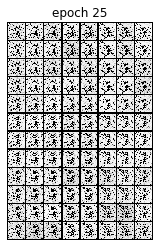

  2%|▏         | 2/117 [00:00<00:08, 13.51it/s]

Epoch 25 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.00it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 14.39it/s]

Epoch 26 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.89it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 14.81it/s]

Epoch 27 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.07it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.50it/s]

Epoch 28 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.03it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 14.81it/s]

Epoch 29 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


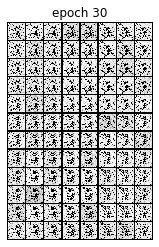

  2%|▏         | 2/117 [00:00<00:09, 12.50it/s]

Epoch 30 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.02it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 16.00it/s]

Epoch 31 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.95it/s]                         
  2%|▏         | 2/117 [00:00<00:08, 14.18it/s]

Epoch 32 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.81it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.38it/s]

Epoch 33 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 15.78it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.87it/s]

Epoch 34 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


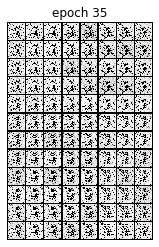

  2%|▏         | 2/117 [00:00<00:08, 13.61it/s]

Epoch 35 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.91it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.87it/s]

Epoch 36 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.30it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.53it/s]

Epoch 37 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.83it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 16.00it/s]

Epoch 38 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:05, 19.72it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.04it/s]

Epoch 39 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


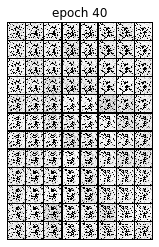

  2%|▏         | 2/117 [00:00<00:07, 14.93it/s]

Epoch 40 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.38it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.53it/s]

Epoch 41 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:05, 19.69it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.35it/s]

Epoch 42 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.12it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 16.00it/s]

Epoch 43 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.27it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.75it/s]

Epoch 44 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


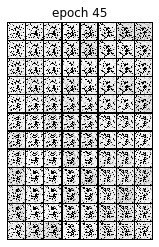

  2%|▏         | 2/117 [00:00<00:08, 13.33it/s]

Epoch 45 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.16it/s]                         
  3%|▎         | 3/117 [00:00<00:05, 19.87it/s]

Epoch 46 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.43it/s]                         
  2%|▏         | 2/117 [00:00<00:08, 12.90it/s]

Epoch 47 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.99it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.21it/s]

Epoch 48 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.27it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.87it/s]

Epoch 49 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


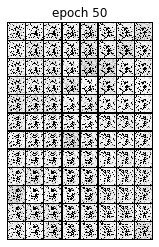

  2%|▏         | 2/117 [00:00<00:06, 16.95it/s]

Epoch 50 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.24it/s]                         
  3%|▎         | 3/117 [00:00<00:05, 20.13it/s]

Epoch 51 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.48it/s]                         
  2%|▏         | 2/117 [00:00<00:05, 19.61it/s]

Epoch 52 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.43it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.67it/s]

Epoch 53 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.86it/s]                         
  3%|▎         | 3/117 [00:00<00:05, 20.00it/s]

Epoch 54 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.58it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


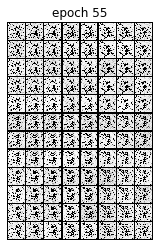

  2%|▏         | 2/117 [00:00<00:08, 14.08it/s]

Epoch 55 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.49it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 19.05it/s]

Epoch 56 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:05, 20.46it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.67it/s]

Epoch 57 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.47it/s]                         
  2%|▏         | 2/117 [00:00<00:05, 19.42it/s]

Epoch 58 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.53it/s]                         
  2%|▏         | 2/117 [00:00<00:08, 13.70it/s]

Epoch 59 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.19it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


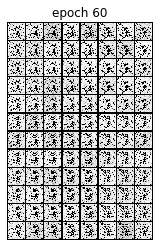

  2%|▏         | 2/117 [00:00<00:07, 14.81it/s]

Epoch 60 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.79it/s]                         
  2%|▏         | 2/117 [00:00<00:08, 12.82it/s]

Epoch 61 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:05, 19.92it/s]                         
  2%|▏         | 2/117 [00:00<00:05, 19.61it/s]

Epoch 62 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.27it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.87it/s]

Epoch 63 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.76it/s]                         
  3%|▎         | 4/117 [00:00<00:05, 18.85it/s]

Epoch 64 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


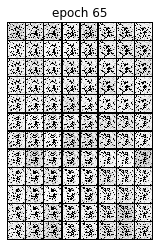

  2%|▏         | 2/117 [00:00<00:07, 14.93it/s]

Epoch 65 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.02it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 16.39it/s]

Epoch 66 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.76it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.24it/s]

Epoch 67 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.99it/s]                         
  2%|▏         | 2/117 [00:00<00:08, 13.33it/s]

Epoch 68 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.06it/s]                         
  2%|▏         | 2/117 [00:00<00:05, 19.42it/s]

Epoch 69 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.98it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


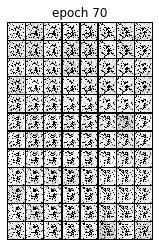

  2%|▏         | 2/117 [00:00<00:07, 14.71it/s]

Epoch 70 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.49it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 19.05it/s]

Epoch 71 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.80it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.87it/s]

Epoch 72 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.41it/s]                         
  2%|▏         | 2/117 [00:00<00:09, 12.20it/s]

Epoch 73 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.26it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.87it/s]

Epoch 74 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


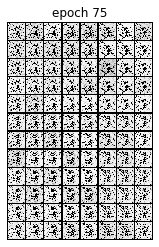

  2%|▏         | 2/117 [00:00<00:07, 14.49it/s]

Epoch 75 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:05, 20.43it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.35it/s]

Epoch 76 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.89it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.39it/s]

Epoch 77 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:05, 19.79it/s]                         
  2%|▏         | 2/117 [00:00<00:05, 20.00it/s]

Epoch 78 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.77it/s]                         
  2%|▏         | 2/117 [00:00<00:09, 12.05it/s]

Epoch 79 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


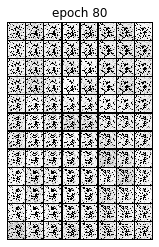

  2%|▏         | 2/117 [00:00<00:07, 15.75it/s]

Epoch 80 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.66it/s]                         
  2%|▏         | 2/117 [00:00<00:08, 13.25it/s]

Epoch 81 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.36it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.35it/s]

Epoch 82 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.35it/s]                         
  2%|▏         | 2/117 [00:00<00:08, 13.16it/s]

Epoch 83 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.41it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.69it/s]

Epoch 84 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:05, 19.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


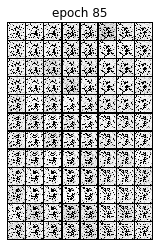

  2%|▏         | 2/117 [00:00<00:07, 16.00it/s]

Epoch 85 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.49it/s]                         
  3%|▎         | 3/117 [00:00<00:05, 19.54it/s]

Epoch 86 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.35it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.35it/s]

Epoch 87 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.43it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 19.05it/s]

Epoch 88 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:05, 20.13it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.24it/s]

Epoch 89 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


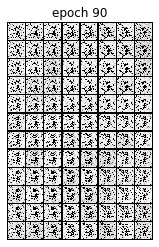

  2%|▏         | 2/117 [00:00<00:08, 13.89it/s]

Epoch 90 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.48it/s]                         
  2%|▏         | 2/117 [00:00<00:05, 19.42it/s]

Epoch 91 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.05it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.69it/s]

Epoch 92 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:05, 20.44it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.52it/s]

Epoch 93 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.74it/s]                         
  3%|▎         | 3/117 [00:00<00:05, 19.74it/s]

Epoch 94 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


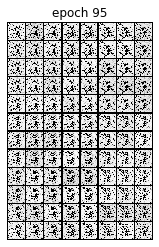

  1%|          | 1/117 [00:00<00:17,  6.69it/s]

Epoch 95 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.72it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 19.05it/s]

Epoch 96 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.88it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.02it/s]

Epoch 97 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.21it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.54it/s]

Epoch 98 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 19.13it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.24it/s]

Epoch 99 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


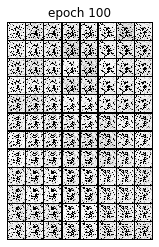

Epoch 100 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


In [14]:
torch.manual_seed(7777)

def generator_loss(output):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, label_fake(output.size(0)))
    return loss

    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss

    ######################################


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        X, _ = data
        X = X.to(device)
        batch_size = len(X)

        # Train Discriminator
        optim_d.zero_grad()
        # Real images
        real_labels = label_real(batch_size)
        output_r = discriminator(X)
        d_real_loss = discriminator_loss(output_r, real_labels)
        d_real_loss.backward()

        # Fake images
        noise = create_noise(batch_size, nz)
        fake_X = generator(noise)
        fake_labels = label_fake(batch_size)
        output_f = discriminator(fake_X)
        d_fake_loss = discriminator_loss(output_f, fake_labels)
        d_fake_loss.backward()

        optim_d.step()
        loss_d += (d_real_loss.item() + d_fake_loss.item())

        # Train Generator
        optim_g.zero_grad()
        noise = create_noise(batch_size, nz)
        fake_X = generator(noise)
        output_g = discriminator(fake_X)
        g_loss = generator_loss(output_g)
        g_loss.backward()
        optim_g.step()
        loss_g += g_loss.item()


        ######################################


    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs_q1b/q1b_gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs_q1b/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_q1b/generator_images.gif', imgs)

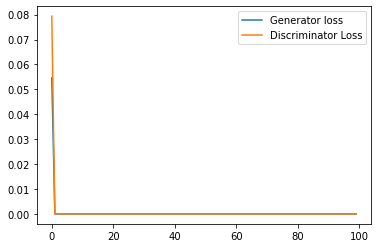

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs_q1b/loss.png')